In [2]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform
# from kllr import kllr_model

%load_ext autoreload
%autoreload 2

## $\Upsilon$-comparison plot

In [3]:
betalims = np.logspace(-4., 1, 1000)

In [5]:
ys = [None] * 3

for i, runid in enumerate([13, 15, 14]):
    data = GSHEWaveform.read_shooting(runid, "../results", 0.15)
    dk = data["xs"][1] - data["xs"][0]
    grid = data["grid"]
    betas = data["betas"]
    hull = GSHEWaveform.build_shadowhull(grid, betas[:, 0], N=200)
    vals = GSHEWaveform.fillshadow(grid, betas[:, 0], hull)
    
    
    ys[i] = GSHEWaveform.get_upsilon_src(grid, vals, betalims, dk)

Eliminating 193 point due to beta with average 0.9378 loops.


/Users/richard/Projects/birefringence/venv_gshe/lib/python3.11/site-packages/GSHEWaveform/shadow.py:108: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2))  # Area element in spherical coords


Eliminating 126 point due to beta with average 0.6984 loops.
Eliminating 83 point due to beta with average 0.7711 loops.


<IPython.core.display.Javascript object>


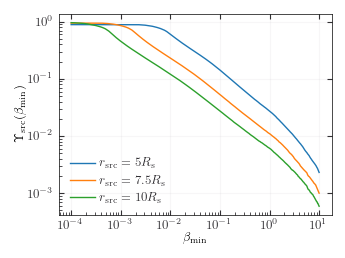

In [10]:
GSHEWaveform.setmplstyle("../plot_style.txt")
# GSHEWaveform.setmplstyle()

plt.figure()

# plt.axvline(1, c="black", alpha=0.5)
plt.plot(betalims, ys[0], label=r"$r_{\rm src}=5 R_{\rm s}$")
plt.plot(betalims, ys[1], label=r"$r_{\rm src}=7.5 R_{\rm s}$")
plt.plot(betalims, ys[2], label=r"$r_{\rm src}=10 R_{\rm s}$")


plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm src}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.tight_layout()
plt.legend()

plt.savefig("/Users/richard/Downloads/upsilons.pdf", dpi=450, bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


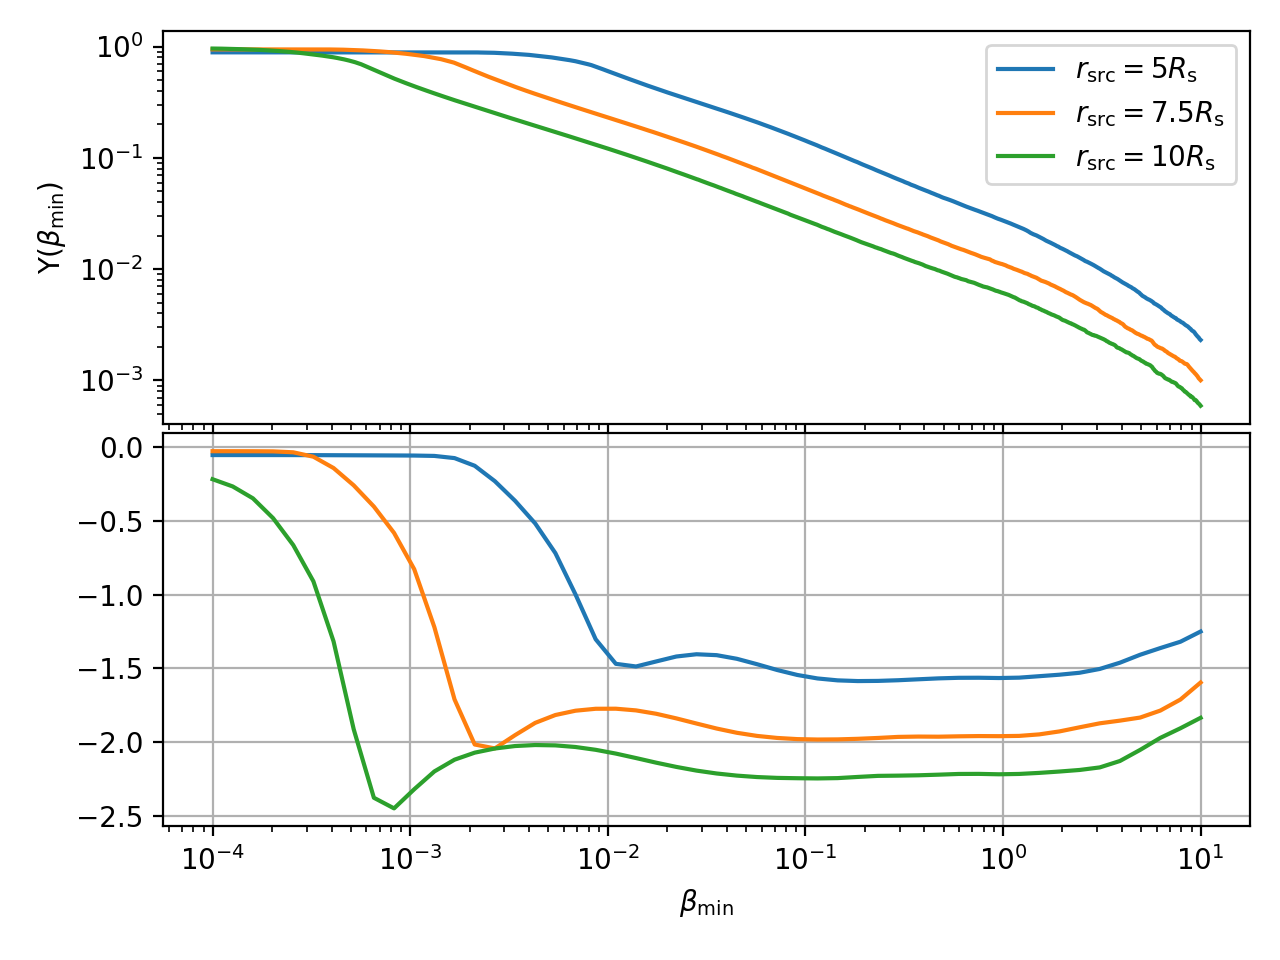

In [6]:
labels = [r"$r_{\rm src}=5 R_{\rm s}$", r"$r_{\rm src}=7.5 R_{\rm s}$", r"$r_{\rm src}=10 R_{\rm s}$"]

GSHEWaveform.setmplstyle()
fig, axs = plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)

for label, y in zip(labels, ys):
    axs[0].plot(betalims, y, label=label)
    
    lm = kllr_model(kernel_width=0.1)
    xrange, yrange_mean, intercept, slope, scatter, skew, kurt = lm.fit(np.log10(betalims), np.log10(y), bins=50)
    axs[1].plot(10**xrange, np.mean(intercept, axis=0))


axs[1].set_xlabel(r"$\beta_{\rm min}$")
axs[0].set_ylabel(r"$\Upsilon(\beta_{\rm min})$")


# axs[1].set_ylabel(r"$\mathrm{d}\log \Upsilon / \mathrm{d} \log \beta_{\rm min}$")

for i in range(2):
    axs[i].set_xscale("log")
axs[0].set_yscale("log")
axs[0].legend()
plt.tight_layout(h_pad=0)
axs[1].grid()
plt.savefig("/Users/richard/Downloads/slope.png", dpi=450)
fig.show()

<IPython.core.display.Javascript object>


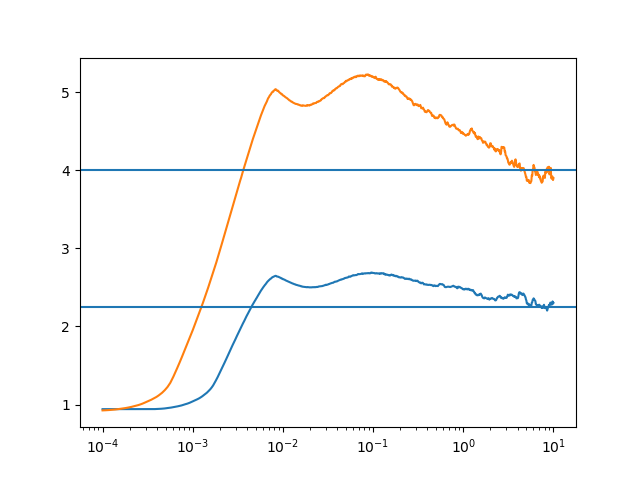

In [22]:
GSHEWaveform.setmplstyle()

plt.figure()

# label=r"$r_{\rm src}=5 R_{\rm s}$"
plt.plot(betalims, ys[0] / ys[1])
plt.plot(betalims, ys[0] / ys[2])

plt.xscale("log")
plt.axhline(2**2)
plt.axhline((7.5/5)**2)

plt.savefig("/Users/richard/Downloads/ratios.png", dpi=300)
plt.show()